**by: [João Ataíde](https://www.joaoataide.com/)**
___

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.axis('off')
    plt.show()

## **Load Data**

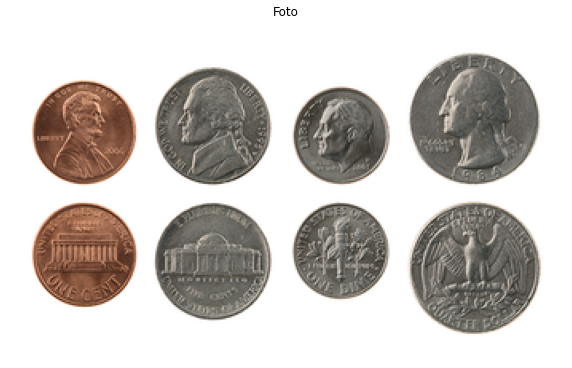

In [29]:
PASTA  = r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics"
args = {"image": f"{PASTA}\\coins02.png"}
image = cv2.imread(args["image"])
plt_imshow("Foto", image)

### Image Gradients
Gradiets are used as the basic building blocks in many computer vision applications

Reveals structural information regarding the objects in an image edges?
*   Boundaries of an object imagen
*   Boundaries of shadowing of lighting conditions in an image
*   Boundaries of parts within object


Gradient: a directional change in image intensity
* $North\ I(x, y - 1)$
* $South\ I(x, y + 1)$
* $East\ I(x + 1, y)$
* $West\ I(x - 1, y)$
this values are clirtical in computing changes.
$ G_y = I(x, y+1) - I(x, y-1)$
$ G_x = I(x + 1, y) - I(x - 1, y)$

for this values we`ll need two terms:
* Gradient magnitude: **measure how strong the change in image intensity**
* Gradient orientation:**which direction the change in intensiti in pointing**

#### Sobel kernels in OpenCV

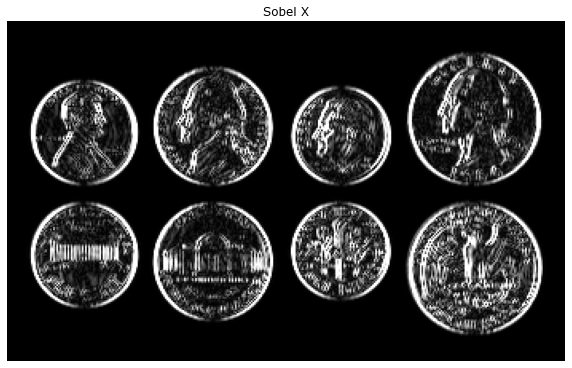

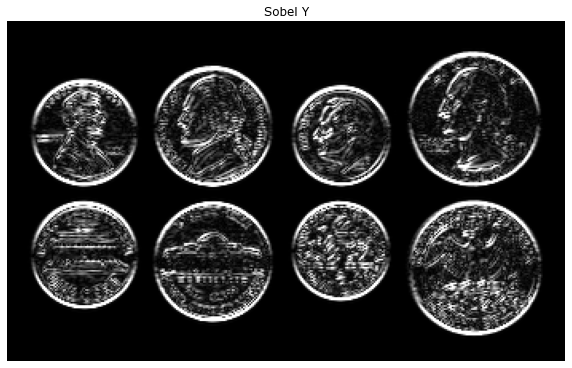

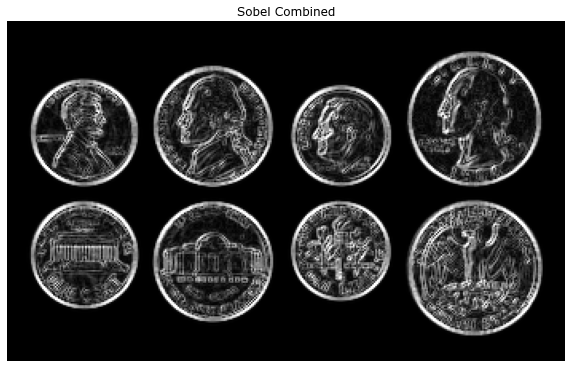

In [33]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gx = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx = 1, dy = 0)
gy = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx = 0, dy = 1)

gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)

sobelCombine = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

plt_imshow("Sobel X", gx)
plt_imshow("Sobel Y", gy)
plt_imshow("Sobel Combined", sobelCombine)

#### Gradient Orientaiton and magnitude in OpenCV

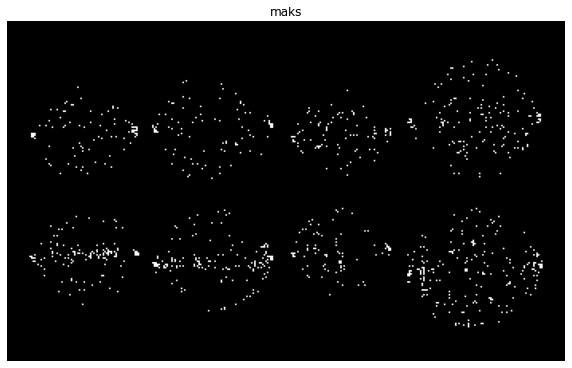

In [45]:
lowerangle = 175.0
upperangle = 180.0

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gx = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx = 1, dy = 0)
gy = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx = 0, dy = 1)

mag = np.sqrt((gx ** 2) + (gy ** 2))
orientation = np.arctan2(gy, gx) * (180 / np.pi) % 180

idxs = np.where(orientation >= lowerangle, orientation, -1)
idxs = np.where(orientation <= upperangle, idxs, -1)
mask = np.zeros(gray.shape, dtype = "uint8")
mask[idxs > -1] = 255

plt_imshow("maks", mask)

### Edge Detection

#### Canny edge detector

John F. Canny in his 1986 paper, A Computational Approach To Edge Detection.

* Step Edge
* Rampe Edge
* Ridge Edge
* Roof Edge

Pass:

1 Gaussian smoothing
2 Computingo Gx and Gy
3 Apply non-maximum sopresison local gradient
4 Defining and applying T upper and T lower

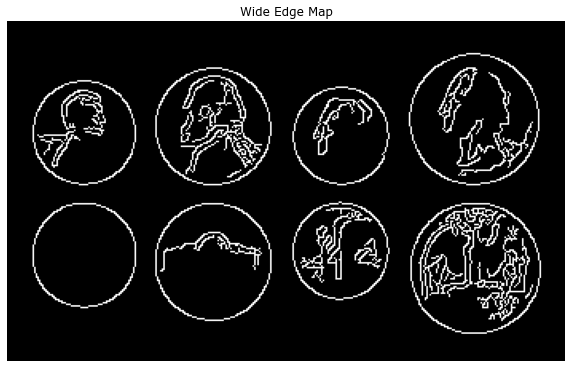

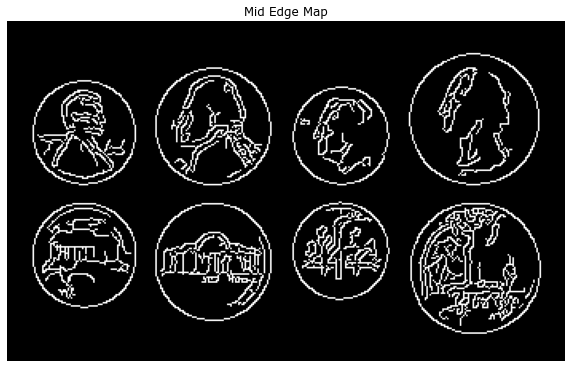

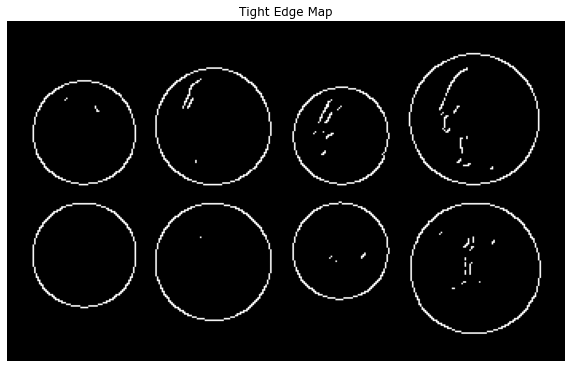

In [55]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

plt_imshow("Wide Edge Map", wide)
plt_imshow("Mid Edge Map", mid)
plt_imshow("Tight Edge Map", tight)